In [1]:
#import dependent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

In [2]:
#Load the data set
df = pd.read_csv('purchase_data.csv',encoding='latin1')
df.head() #Display first 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


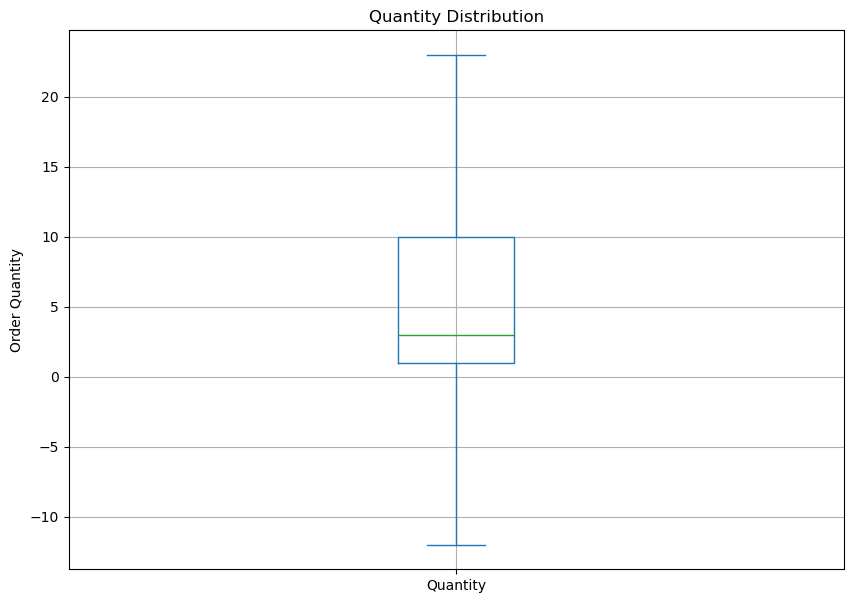

In [3]:
ax = df['Quantity'].plot.box(
    showfliers = False,
    grid = True,
    figsize = (10, 7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

The canceled order were represented with negative values therefore we will filter them out before proceeding with  thw analysis

In [3]:
df = df.loc[df['Quantity'] > 0]

Monthly Flunctuations and transaction count

In [5]:
df.shape

(531285, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [7]:
#Converting the Invoice Date data type to datatime 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
#Create a data frame for the Transaction count per month
monthly_orders = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

monthly_order_df = pd.DataFrame({'Month': monthly_orders.index.strftime('%B %Y'),
                                    'Number of Transaction': monthly_orders.values})

print(monthly_order_df)

             Month  Number of Transaction
0     January 2010                    136
1    February 2010                    143
2       March 2010                     73
3       April 2010                      0
4         May 2010                     88
5        June 2010                    108
6        July 2010                     85
7      August 2010                    123
8   September 2010                    132
9     October 2010                     81
10   November 2010                      0
11   December 2010                    660
12    January 2011                   1364
13   February 2011                   1211
14      March 2011                   1509
15      April 2011                   1452
16        May 2011                   1704
17       June 2011                   1725
18       July 2011                   1750
19     August 2011                   1594
20  September 2011                   1812
21    October 2011                   1930
22   November 2011                

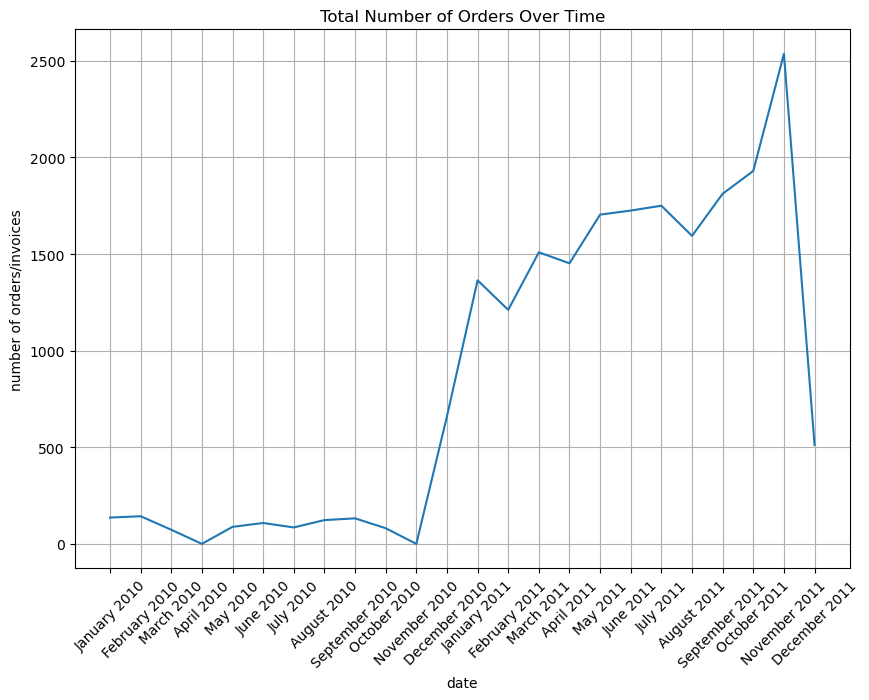

In [16]:
ax = pd.DataFrame(monthly_order_df.values).plot(
    grid=True,
    figsize=(10, 7),
    legend =False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_order_df['Month'])),
    monthly_order_df['Month'],
    rotation = 45
)
plt.show()

There is an irregular/ sharp drop at December 2011; so we investigate it

In [17]:
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

print('Min date: %s\nMax: %s' %(invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 09:26:00
Max: 2011-12-10 17:19:00


* We only have data from December 1, to December 10, 2011. 
* Therefore it will be misrepresentation if we use this data for December sales and revenue.
* Therefore we will disregard it 

In [18]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [19]:
monthly_transaction = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()


monthly_transaction_df = pd.DataFrame({'Month': monthly_transaction.index.strftime('%B %Y'),
                                    'No. of Orders': monthly_transaction.values})

print(monthly_transaction_df)

             Month  No. of Orders
0     January 2010            136
1    February 2010            143
2       March 2010             73
3       April 2010              0
4         May 2010             88
5        June 2010            108
6        July 2010             85
7      August 2010            123
8   September 2010            132
9     October 2010             81
10   November 2010              0
11   December 2010            660
12    January 2011           1364
13   February 2011           1211
14      March 2011           1509
15      April 2011           1452
16        May 2011           1704
17       June 2011           1725
18       July 2011           1750
19     August 2011           1594
20  September 2011           1812
21    October 2011           1930
22   November 2011           2536


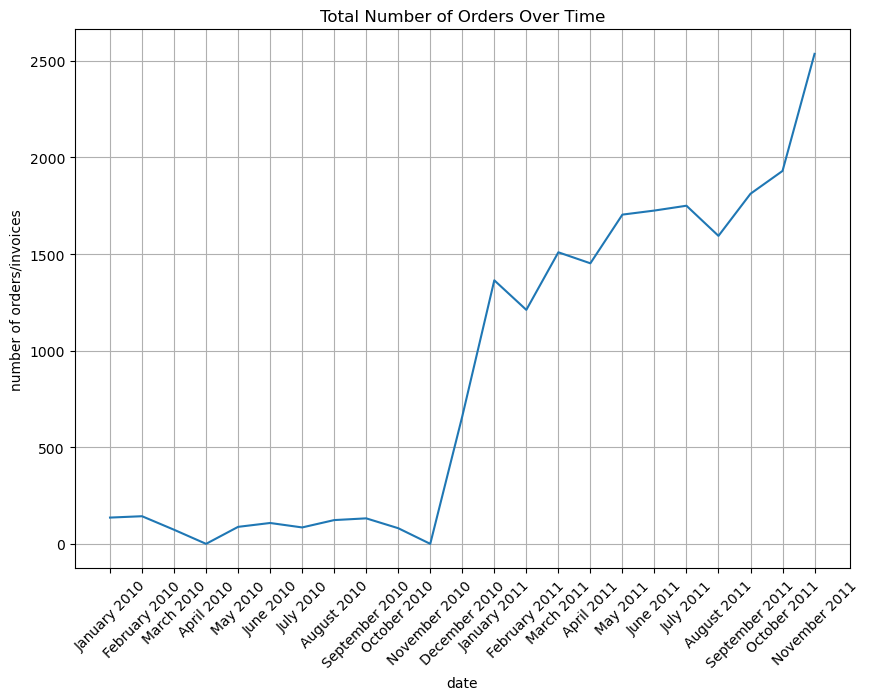

In [20]:
ax = pd.DataFrame(monthly_transaction_df.values).plot(
    grid=True,
    figsize=(10, 7),
    legend =False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_transaction_df.index)),
     monthly_transaction_df['Month'],
    rotation = 45
)
plt.show()

Monthly Revenue

In [21]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

monthly_revenue = df.set_index('InvoiceDate')['Sales'].resample('M').sum()


monthly_revenue_df = pd.DataFrame({'Month': monthly_revenue.index.strftime('%B %Y'),
                                    'Revenue($)': monthly_revenue.values})

print(monthly_revenue_df)

             Month   Revenue($)
0     January 2010    58960.790
1    February 2010    47748.380
2       March 2010    46943.710
3       April 2010        0.000
4         May 2010    31774.950
5        June 2010    54830.460
6        July 2010    99618.200
7      August 2010    45389.980
8   September 2010    53586.180
9     October 2010    59182.920
10   November 2010        0.000
11   December 2010   325710.570
12    January 2011   702201.270
13   February 2011   576737.190
14      March 2011   758658.510
15      April 2011   707968.041
16        May 2011   826693.540
17       June 2011   788024.860
18       July 2011   906494.271
19     August 2011   755231.150
20  September 2011  1205462.472
21    October 2011  1029973.780
22   November 2011  1340417.580


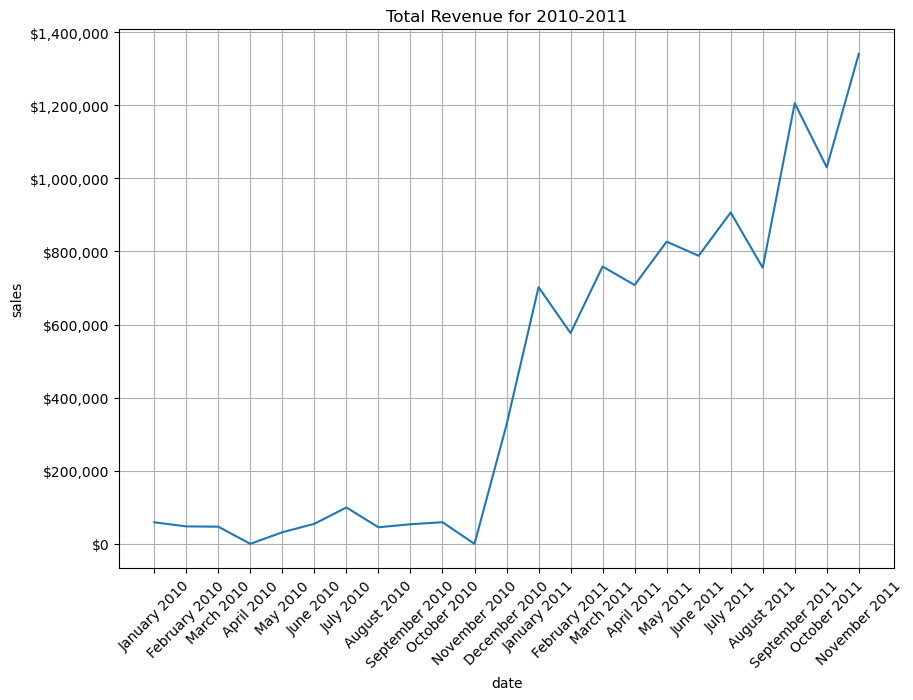

In [23]:
ax = pd.DataFrame(monthly_revenue.values).plot(
    grid=True,
    figsize=(10, 7),
    legend =False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue for 2010-2011')

plt.gca().yaxis.set_major_formatter(tick.StrMethodFormatter('${x:,.0f}')) 

plt.xticks(
    range(len(monthly_revenue_df.index)),
    monthly_revenue_df['Month'],
    rotation = 45
)
plt.show()

# Identify Product categories with sustained increases in sales.

In [24]:
#Quantity Of Particular products per month
date_item_df = df.set_index('InvoiceDate').groupby([
 pd.Grouper(freq='M'), 'StockCode'
])['Quantity'].sum()


In [25]:
last_month_sorted_df = date_item_df.loc['2011-11'].to_frame().sort_values(
    by='Quantity', ascending=False
).reset_index()

last_month_sorted_df.head(10)

,InvoiceDate,StockCode,Quantity
0,2011-11-30,84826,12543
1,2011-11-30,23084,10775
2,2011-11-30,22197,9639
3,2011-11-30,85123A,6868
4,2011-11-30,22086,5498
5,2011-11-30,84879,5130
6,2011-11-30,84077,4699
7,2011-11-30,21108,4559
8,2011-11-30,85099B,3758
9,2011-11-30,22578,3678


In [26]:
date_item_df = df.loc[
 df['StockCode'].isin(['84826', '23084', '22197', '85099B', '22086'])
].set_index('InvoiceDate').groupby([
 pd.Grouper(freq='M'), 'StockCode'
])['Quantity'].sum()
date_item_df


InvoiceDate  StockCode
2010-01-31   22086          274
             22197          271
             85099B         556
2010-02-28   22086          136
             22197           74
                          ...  
2011-11-30   22086         5498
             22197         9639
             23084        10775
             84826        12543
             85099B        3758
Name: Quantity, Length: 85, dtype: int64

In [27]:
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)
trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-01-31,274.0,271.0,0.0,0.0,556.0
2010-02-28,136.0,74.0,0.0,60.0,48.0
2010-03-31,140.0,67.0,0.0,0.0,49.0
2010-05-31,133.0,81.0,0.0,0.0,39.0
2010-06-30,237.0,265.0,0.0,0.0,157.0
2010-07-31,274.0,130.0,0.0,0.0,343.0
2010-08-31,107.0,213.0,0.0,0.0,205.0
2010-09-30,154.0,260.0,0.0,0.0,21.0
2010-10-31,223.0,95.0,0.0,0.0,125.0


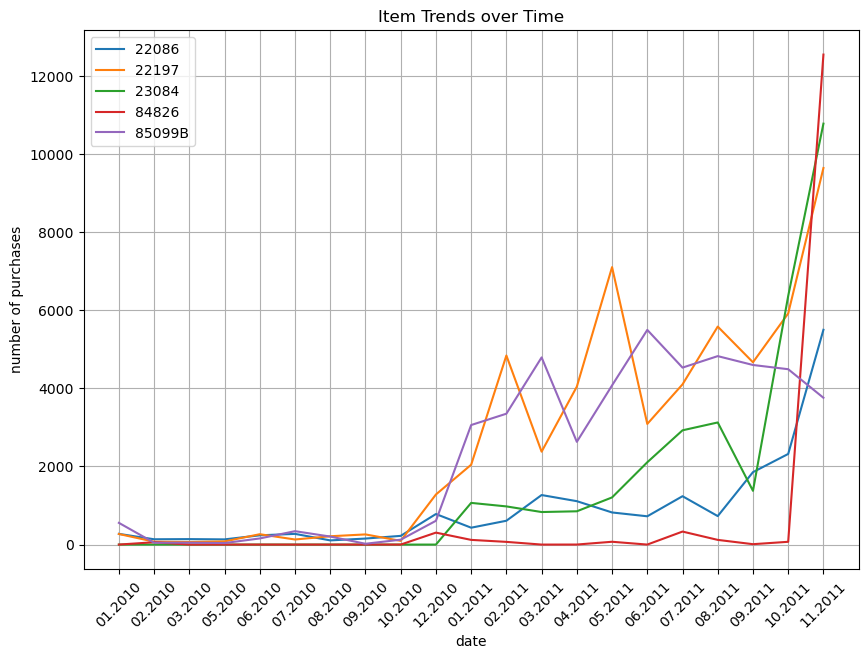

In [28]:
ax = pd.DataFrame(trending_itmes_df.values).plot(
 figsize=(10,7),
 grid=True,
)
ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')
ax.legend(trending_itmes_df.columns, loc='upper left')
plt.xticks(
 range(len(trending_itmes_df.index)), 
 [x.strftime('%m.%Y') for x in trending_itmes_df.index], 
 rotation=45
)
plt.show()


# Sales Pattern across different Seasons

       Season                        Description  Quantity
2153   Autumn        PAPER CRAFT , LITTLE BIRDIE     80995
12778  Winter     MEDIUM CERAMIC TOP STORAGE JAR     74327
2404   Autumn                     POPCORN HOLDER     18715
7221   Spring  WORLD WAR 2 GLIDERS ASSTD DESIGNS     18452
2452   Autumn                 RABBIT NIGHT LIGHT     18048
3567   Autumn  WORLD WAR 2 GLIDERS ASSTD DESIGNS     16053
8975   Summer            JUMBO BAG RED RETROSPOT     15554
1625   Autumn            JUMBO BAG RED RETROSPOT     12990
237    Autumn     ASSTD DESIGN 3D PAPER STICKERS     12624
3877   Spring          ASSORTED COLOURS SILK FAN     12311


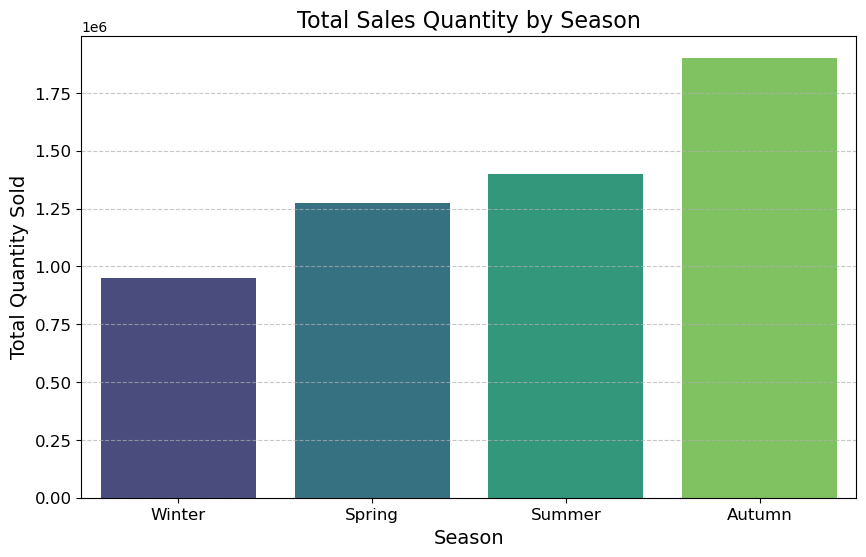

In [32]:
# Convert InvoiceDate to datetime format and extract seasons
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')
df['Month'] = df['InvoiceDate'].dt.month

# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

# Group by Season and Description to analyze product sales patterns
seasonal_sales = df.groupby(['Season', 'Description'])['Quantity'].sum().reset_index()

# Display top products for each season
print(seasonal_sales.sort_values(by='Quantity', ascending=False).head(10))

# Aggregate sales quantity by season for visualization
seasonal_summary = df.groupby('Season')['Quantity'].sum().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

# Plot seasonal sales patterns
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_summary.index, y=seasonal_summary.values, palette='viridis')
plt.title('Total Sales Quantity by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Customer behaviour

In [35]:
# Analyze recurring patterns by CustomerID
customer_behavior = df.groupby('CustomerID').agg(
    TotalTransactions=('InvoiceNo', 'nunique'),
    TotalQuantity=('Quantity', 'sum'),
    TotalSpent=('UnitPrice', lambda x: (x * df['Quantity']).sum())
).reset_index()

In [36]:
# Display top 10 customers by total spending
top_customers = customer_behavior.sort_values(by='TotalSpent', ascending=False).head(10)
print("Top 10 Customers by Total Spending:")
print(top_customers)

Top 10 Customers by Total Spending:
      CustomerID  TotalTransactions  TotalQuantity  TotalSpent
1676     14646.0                 70         183237   262901.96
4173     18102.0                 60          64124   259657.30
3703     17450.0                 45          69347   192798.73
2988     16446.0                  2          80997   168472.50
1866     14911.0                195          78505   139866.72
55       12415.0                 21          77670   124914.53
1324     14156.0                 54          57809   116959.78
3746     17511.0                 30          63559    89617.72
2685     16029.0                 63          40208    81024.84
0        12346.0                  1          74215    77183.60


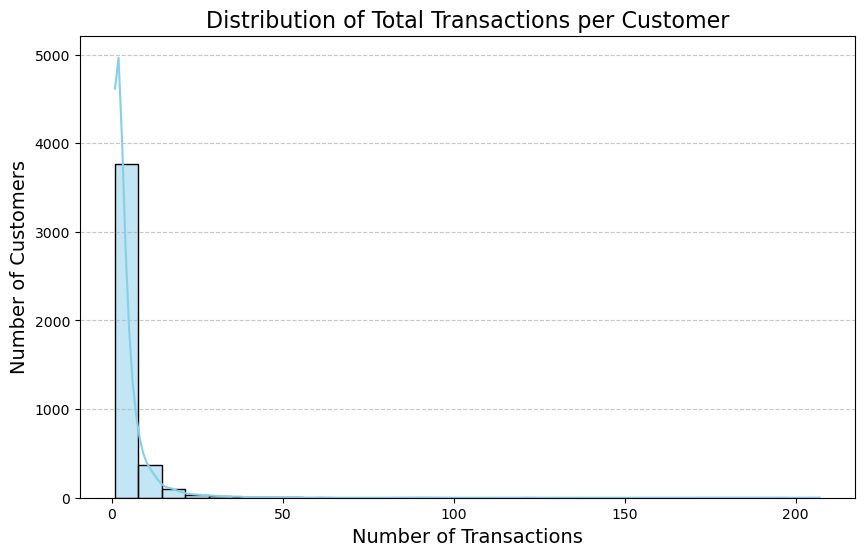

In [37]:
# Plot customer purchasing frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_behavior['TotalTransactions'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Transactions per Customer', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
# Identify changes in product preferences over time
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
product_trends = df.groupby(['YearMonth', 'Description'])['Quantity'].sum().reset_index()


C:\Users\USER PC\AppData\Local\Temp\ipykernel_2648\2560731683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products_trends['YearMonth'] = top_products_trends['YearMonth'].astype(str)


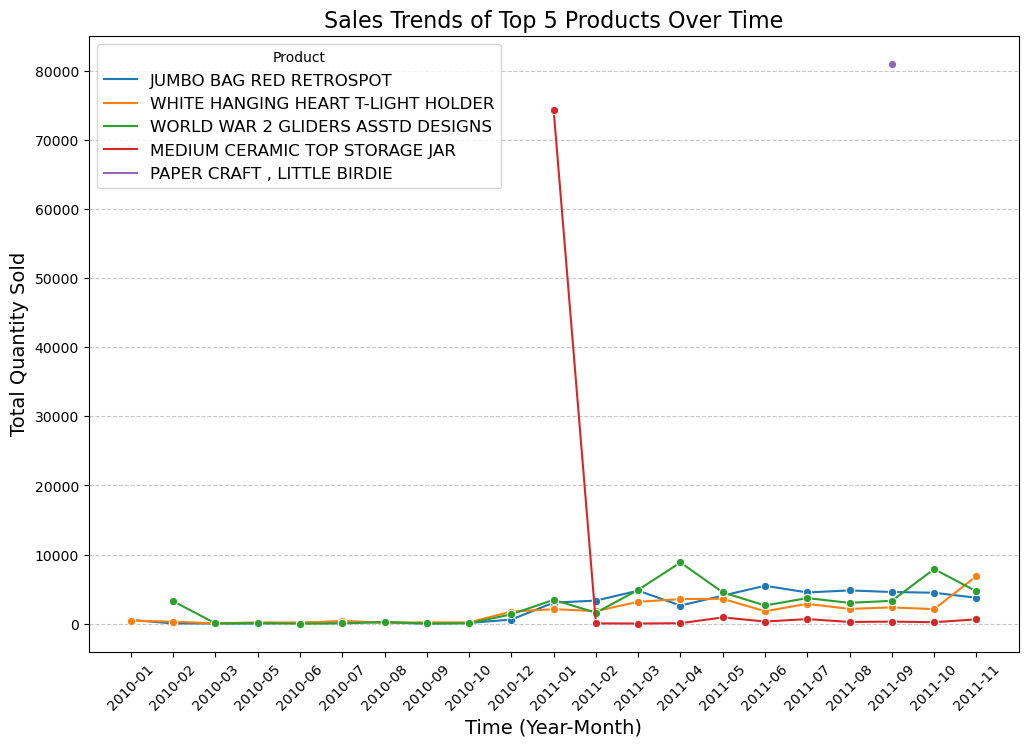

In [41]:
# Plot trends for top 5 products over time
top_products = product_trends.groupby('Description')['Quantity'].sum().nlargest(5).index
top_products_trends = product_trends[product_trends['Description'].isin(top_products)]
# Ensure YearMonth is a string for plotting
top_products_trends['YearMonth'] = top_products_trends['YearMonth'].astype(str)

plt.figure(figsize=(12, 8))
sns.lineplot(data=top_products_trends, x='YearMonth', y='Quantity', hue='Description', marker='o')
plt.title('Sales Trends of Top 5 Products Over Time', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Product', fontsize=12)
plt.show()

In [42]:
# Insights for marketing strategies
print("\nMarketing Strategy Suggestions:")
print("- Focus on retaining high-value customers through loyalty programs.")
print("- Optimize inventory for top-performing products based on seasonal trends.")
print("- Re-engage dormant customers by analyzing the frequency of their past purchases.")


Marketing Strategy Suggestions:
- Focus on retaining high-value customers through loyalty programs.
- Optimize inventory for top-performing products based on seasonal trends.
- Re-engage dormant customers by analyzing the frequency of their past purchases.


In [43]:
#Repeating Customer
customer_df = df.groupby(
    by= ['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales' : sum,
    'CustomerID' : max,
    'Country' : max,
}).reset_index()

In [94]:
print(customer_df.head(5))

  InvoiceNo         InvoiceDate   Sales  CustomerID         Country
0    536365 2010-01-12 08:26:00  139.12     17850.0  United Kingdom
1    536366 2010-01-12 08:28:00   22.20     17850.0  United Kingdom
2    536367 2010-01-12 08:34:00  278.73     13047.0  United Kingdom
3    536368 2010-01-12 08:34:00   70.05     13047.0  United Kingdom
4    536369 2010-01-12 08:35:00   17.85     13047.0  United Kingdom


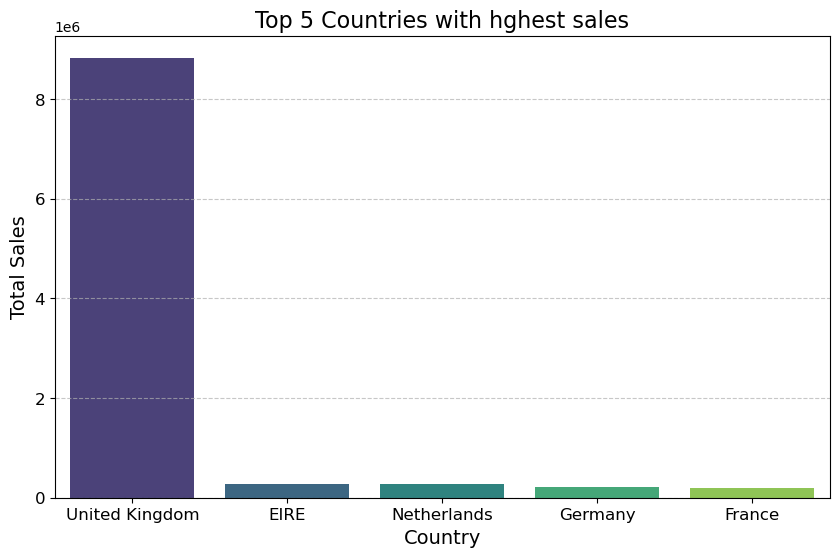

In [54]:
sales_per_country = df.groupby('Country')['Sales'].sum().reset_index()
# Get the top 5 countries by sales
top_5_sales = sales_per_country.nlargest(5, 'Sales')
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_sales['Country'], y=top_5_sales['Sales'].values, palette='viridis')
plt.title('Top 5 Countries with hghest sales', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [99]:
monthly_repeated_customers_df = customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq = 'M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']


In [100]:
monthly_repeated_customers_df

InvoiceDate
2010-01-31     12
2010-02-28     11
2010-03-31      7
2010-04-30      0
2010-05-31      7
2010-06-30      9
2010-07-31      5
2010-08-31     10
2010-09-30      7
2010-10-31     11
2010-11-30      0
2010-12-31     79
2011-01-31    211
2011-02-28    164
2011-03-31    223
2011-04-30    210
2011-05-31    293
2011-06-30    264
2011-07-31    271
2011-08-31    261
2011-09-30    272
2011-10-31    285
2011-11-30    459
Freq: M, Name: CustomerID, dtype: int64

In [101]:
monthly_unique_customer_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [102]:
print(monthly_unique_customer_df)

InvoiceDate
2010-01-31      95
2010-02-28      99
2010-03-31      50
2010-04-30       0
2010-05-31      75
2010-06-30      82
2010-07-31      65
2010-08-31      99
2010-09-30      90
2010-10-31      53
2010-11-30       0
2010-12-31     431
2011-01-31     875
2011-02-28     806
2011-03-31     943
2011-04-30     890
2011-05-31    1008
2011-06-30    1033
2011-07-31    1077
2011-08-31     955
2011-09-30    1189
2011-10-31    1250
2011-11-30    1479
Freq: M, Name: CustomerID, dtype: int64


In [103]:
 monthly_repeated_percentge = monthly_repeated_customers_df/ monthly_unique_customer_df * 100.0

In [104]:
monthly_repeated_percentge

InvoiceDate
2010-01-31    12.631579
2010-02-28    11.111111
2010-03-31    14.000000
2010-04-30          NaN
2010-05-31     9.333333
2010-06-30    10.975610
2010-07-31     7.692308
2010-08-31    10.101010
2010-09-30     7.777778
2010-10-31    20.754717
2010-11-30          NaN
2010-12-31    18.329466
2011-01-31    24.114286
2011-02-28    20.347395
2011-03-31    23.647932
2011-04-30    23.595506
2011-05-31    29.067460
2011-06-30    25.556631
2011-07-31    25.162488
2011-08-31    27.329843
2011-09-30    22.876367
2011-10-31    22.800000
2011-11-30    31.034483
Freq: M, Name: CustomerID, dtype: float64

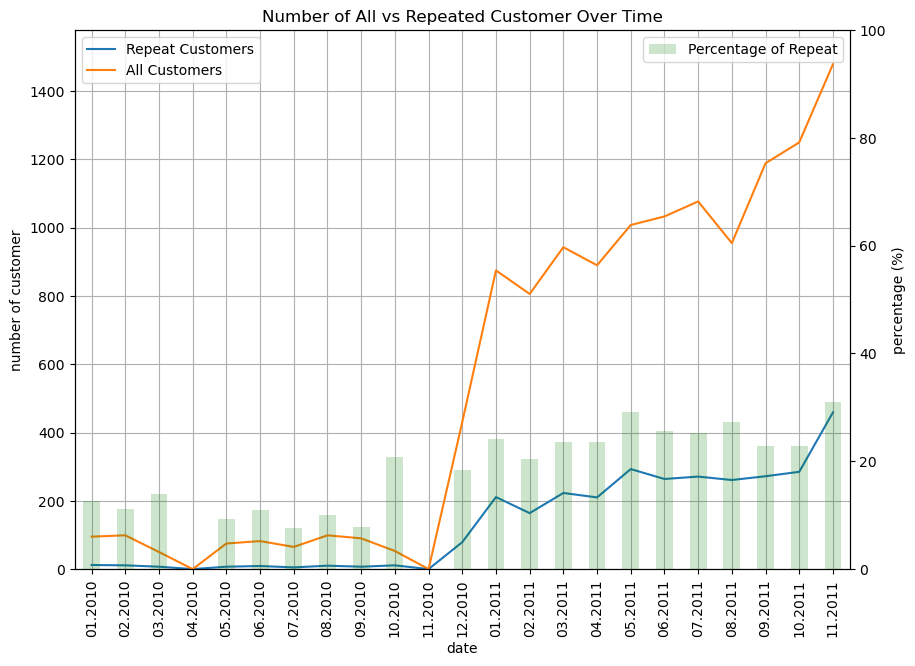

In [107]:
ax = pd.DataFrame(monthly_repeated_customers_df.values).plot(
    figsize=(10, 7)
)
pd.DataFrame(monthly_unique_customer_df.values).plot(
    ax= ax,
    grid= True
)

ax2 = pd.DataFrame(monthly_repeated_percentge.values).plot.bar(
    ax=ax,
    grid = True,
    secondary_y = True,
    color = 'green',
    alpha = 0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customer')
ax.set_title('Number of All vs Repeated Customer Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')
ax.set_ylim([0, monthly_unique_customer_df.values.max()+100])
ax2.set_ylim([0, 100])
plt.xticks(
 range(len(monthly_repeated_customers_df.index)), 
 [x.strftime('%m.%Y') for x in monthly_repeated_customers_df.index], 
 rotation=45
)
plt.show()


In [108]:
monthly_rev_repeat_customers_df = customer_df .set_index('InvoiceDate').groupby([
 pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue * 100.0


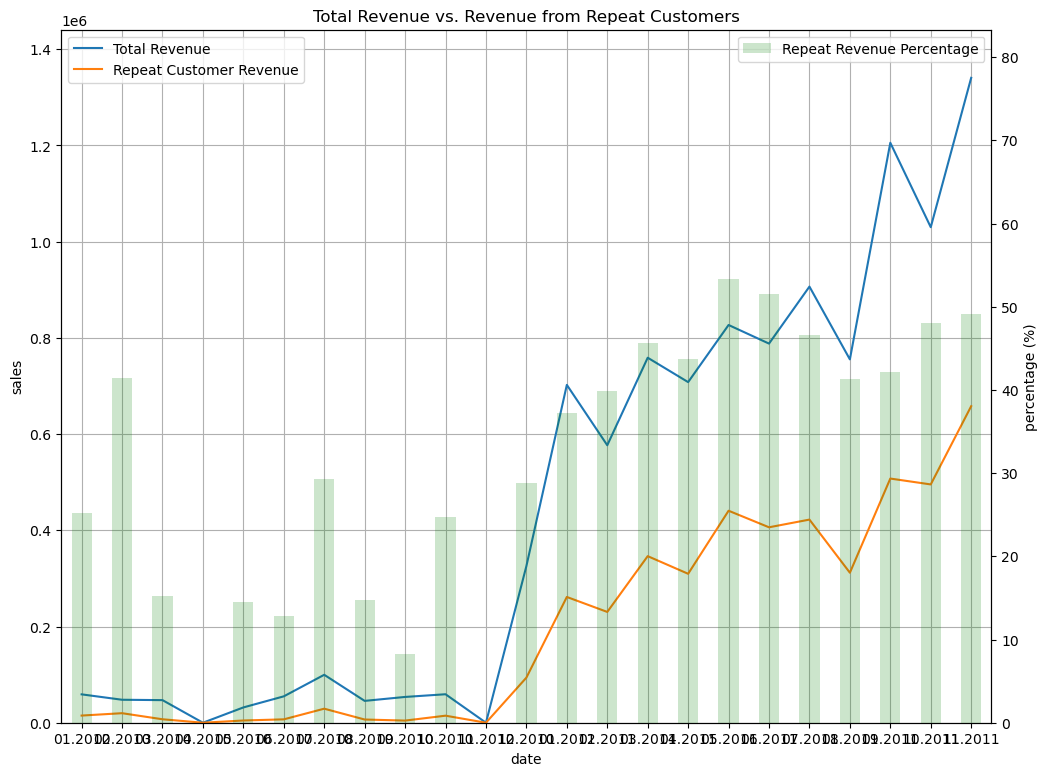

In [111]:
ax = pd.DataFrame(monthly_revenue.values).plot(figsize=(12,9))
pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
 ax=ax,
 grid=True,
)
ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')
ax.legend(['Total Revenue', 'Repeat Customer Revenue'])
ax.set_ylim([0, max(monthly_revenue.values)+100000])
ax2 = ax.twinx()
pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
 ax=ax2,
 kind='bar',
 color='g',
 alpha=0.2
)
ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])
ax2.set_xticklabels([
 x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])
plt.show()


In [4]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')

# Group by CustomerID and InvoiceNo for transaction-level data
customer_transactions = df.groupby(['CustomerID', 'InvoiceNo']).agg(
    TransactionDate=('InvoiceDate', 'min'),
    TotalSpent=('UnitPrice', lambda x: (x * df['Quantity']).sum()),
    TotalQuantity=('Quantity', 'sum'),
    UniqueProducts=('Description', 'nunique')
).reset_index()

# Identify recurring patterns by customer
customer_behavior = customer_transactions.groupby('CustomerID').agg(
    AvgTransactionValue=('TotalSpent', 'mean'),
    AvgItemsPerPurchase=('TotalQuantity', 'mean'),
    UniqueProductsPerTransaction=('UniqueProducts', 'mean'),
    PurchaseFrequency=('TransactionDate', 'count')
).reset_index()

# Display top customers by purchase frequency
top_customers = customer_behavior.sort_values(by='PurchaseFrequency', ascending=False).head(10)
print("Top 10 Customers by Purchase Frequency:")
print(top_customers)

Top 10 Customers by Purchase Frequency:
      CustomerID  AvgTransactionValue  AvgItemsPerPurchase  \
326      12748.0           160.570143           122.609524   
1880     14911.0           715.547562           400.572139   
4011     17841.0           330.577177           186.056452   
562      13089.0           606.451856           320.309278   
1662     14606.0           130.716667            66.924731   
2177     15311.0           667.779121           419.714286   
481      12971.0           130.115233           108.011628   
1690     14646.0          3786.567838          2668.797297   
2703     16029.0          1286.108571           638.222222   
796      13408.0           453.500645           261.806452   

      UniqueProductsPerTransaction  PurchaseFrequency  
326                      20.400000                210  
1880                     28.218905                201  
4011                     60.282258                124  
562                      18.680412                 97

C:\Users\USER PC\AppData\Local\Temp\ipykernel_8340\790719671.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_trends_top['YearMonth'] = product_trends_top['YearMonth'].astype(str)


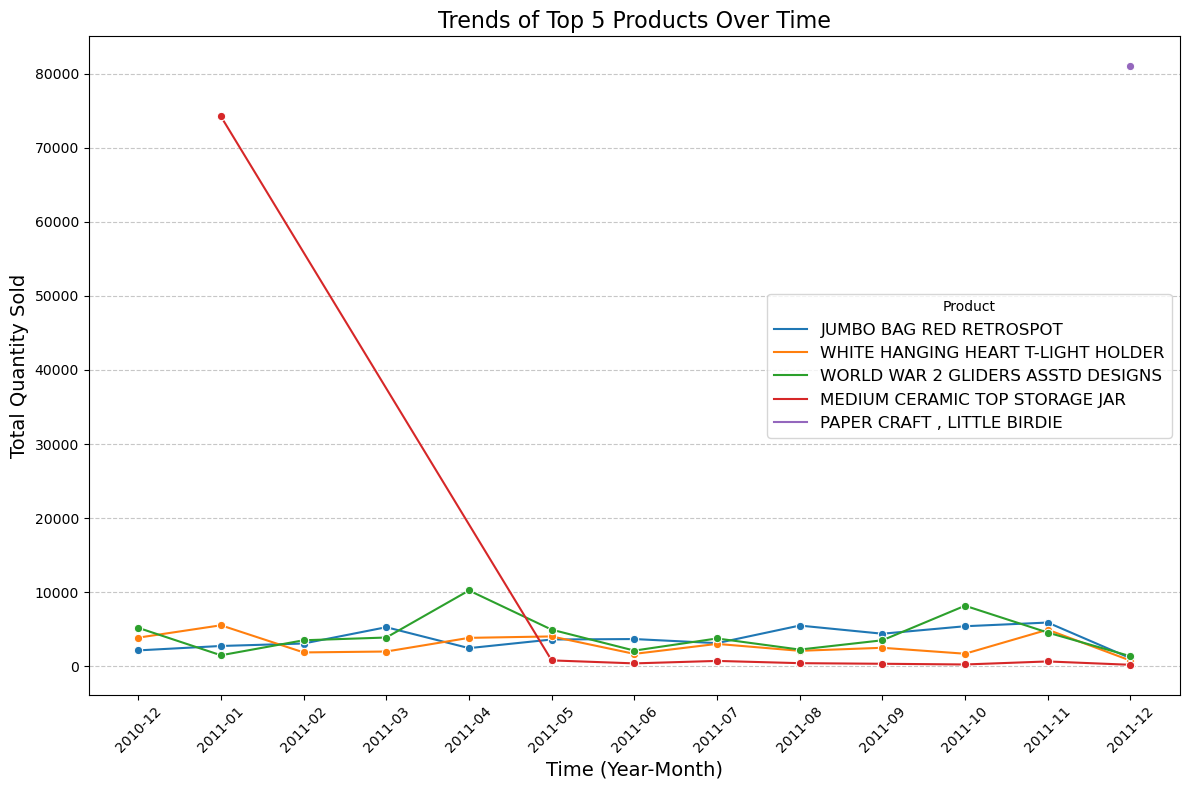

In [7]:
# Extract Year-Month as a period
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Aggregate sales data
product_trends = df.groupby(['YearMonth', 'Description'])['Quantity'].sum().reset_index()

# Identify top 5 products based on total sales
top_products = product_trends.groupby('Description')['Quantity'].sum().nlargest(5).index

# Filter for only top products
product_trends_top = product_trends[product_trends['Description'].isin(top_products)]

# Convert YearMonth to string for plotting
product_trends_top['YearMonth'] = product_trends_top['YearMonth'].astype(str)

# Plotting the trends
plt.figure(figsize=(12, 8))
sns.lineplot(data=product_trends_top, x='YearMonth', y='Quantity', hue='Description', marker='o')
plt.title('Trends of Top 5 Products Over Time', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Product', fontsize=12)
plt.tight_layout()
plt.show()


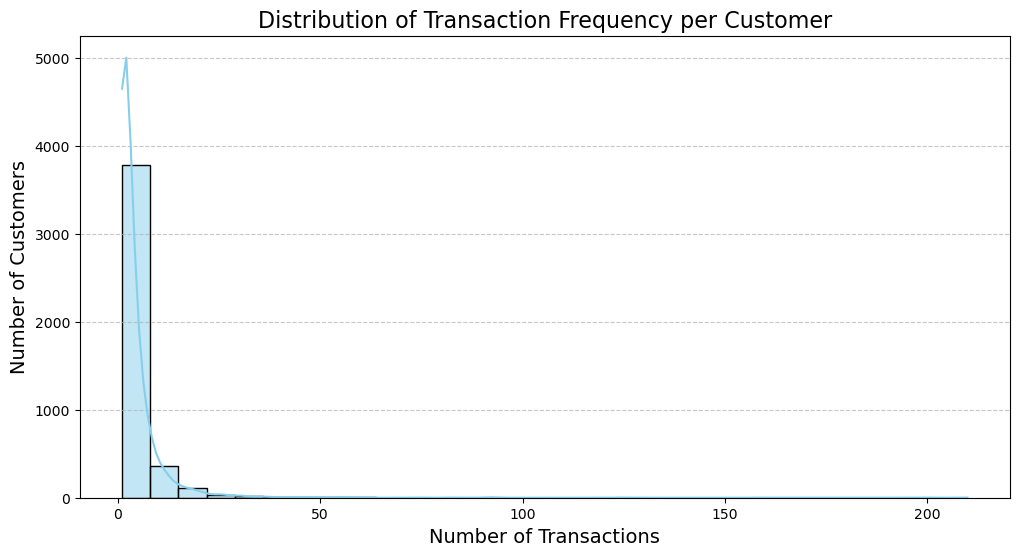

In [11]:
# Calculate transaction frequency for each customer
customer_frequency = customer_transactions.groupby('CustomerID')['TransactionDate'].nunique().reset_index()
customer_frequency.columns = ['CustomerID', 'TransactionCount']

# Visualize transaction frequency distribution
plt.figure(figsize=(12, 6))
sns.histplot(customer_frequency['TransactionCount'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Transaction Frequency per Customer', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


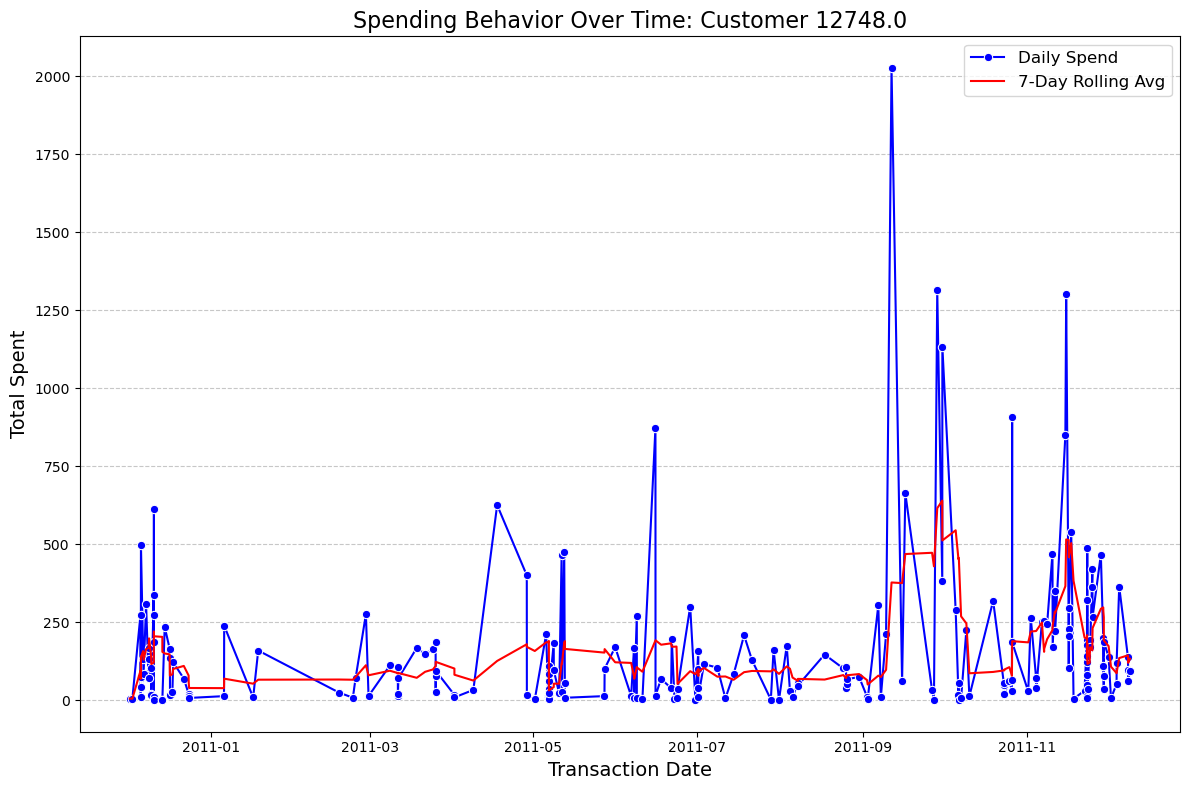

In [17]:


# Filter data for a specific customer
customer_id = top_customers.iloc[0]['CustomerID']
customer_data = customer_transactions[customer_transactions['CustomerID'] == customer_id]

# Sort by TransactionDate to ensure correct time series analysis
customer_data = customer_data.sort_values('TransactionDate')

# Calculate rolling average of spending behavior (7-day window, for example)
customer_data['RollingAvgSpent'] = customer_data['TotalSpent'].rolling(window=7, min_periods=1).mean()

# Plot the spending behavior over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=customer_data, x='TransactionDate', y='TotalSpent', marker='o', color='blue', label='Daily Spend')
sns.lineplot(data=customer_data, x='TransactionDate', y='RollingAvgSpent', marker='', color='red', label='7-Day Rolling Avg')
plt.title(f'Spending Behavior Over Time: Customer {customer_id}', fontsize=16)
plt.xlabel('Transaction Date', fontsize=14)
plt.ylabel('Total Spent', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


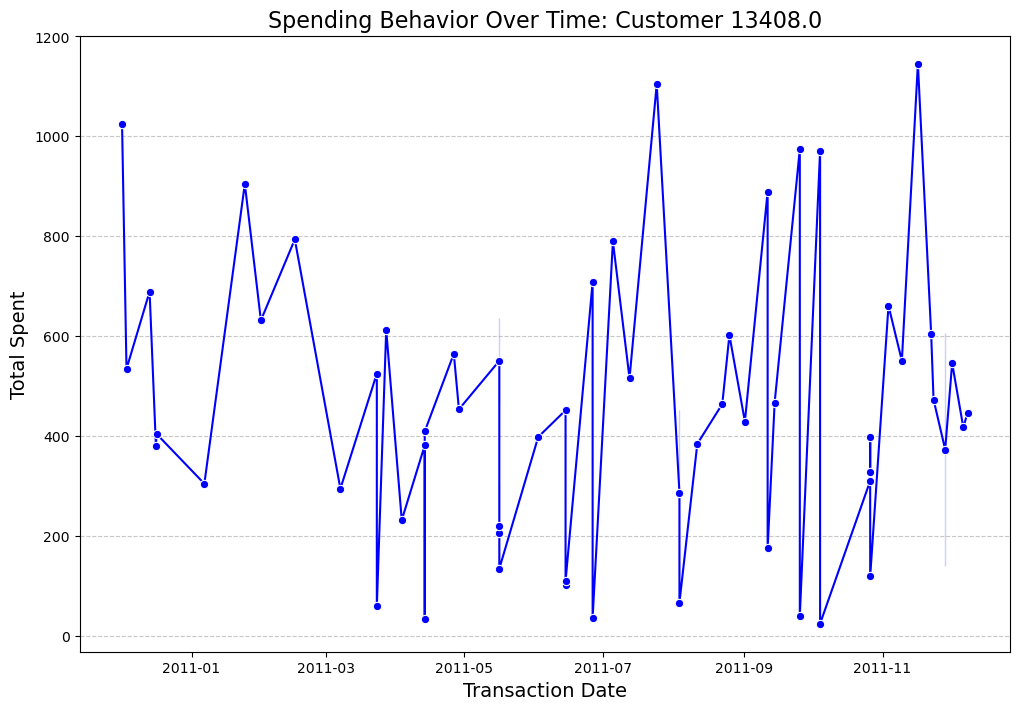


Actionable Insights:
- Focus on high-frequency customers with loyalty programs.
- Use product trend data for dynamic inventory planning.
- Implement targeted marketing based on changing customer preferences.


In [32]:
# Analyze shifts in purchasing frequency for a sample customer
customer_id = top_customers.iloc[9]['CustomerID']
customer_data = customer_transactions[customer_transactions['CustomerID'] == customer_id]

plt.figure(figsize=(12, 8))
sns.lineplot(data=customer_data, x='TransactionDate', y='TotalSpent', marker='o', color='blue')
plt.title(f'Spending Behavior Over Time: Customer {customer_id}', fontsize=16)
plt.xlabel('Transaction Date', fontsize=14)
plt.ylabel('Total Spent', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Insights and suggestions
print("\nActionable Insights:")
print("- Focus on high-frequency customers with loyalty programs.")
print("- Use product trend data for dynamic inventory planning.")
print("- Implement targeted marketing based on changing customer preferences.")


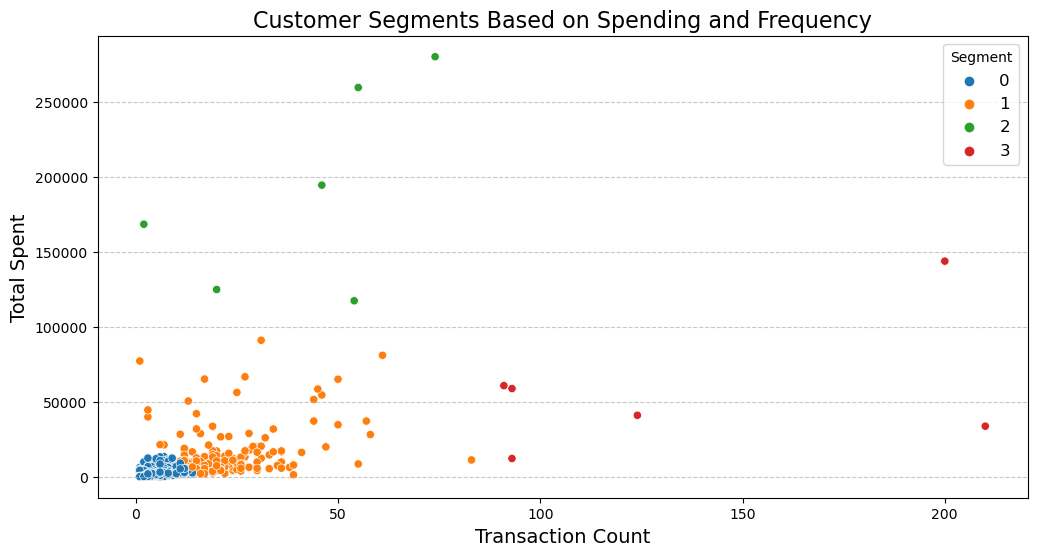

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering (e.g., TotalSpent, TransactionCount)
customer_summary = customer_transactions.groupby('CustomerID').agg({
    'TotalSpent': 'sum',
    'TransactionDate': 'nunique'
}).rename(columns={'TransactionDate': 'TransactionCount'})

# Normalize data for clustering
scaler = StandardScaler()
customer_summary_scaled = scaler.fit_transform(customer_summary)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_summary['Segment'] = kmeans.fit_predict(customer_summary_scaled)

# Visualize segments
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_summary, x='TransactionCount', y='TotalSpent', hue='Segment', palette='tab10')
plt.title('Customer Segments Based on Spending and Frequency', fontsize=16)
plt.xlabel('Transaction Count', fontsize=14)
plt.ylabel('Total Spent', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Segment', fontsize=12)
plt.show()
